In [1]:
import sys
sys.path.append("C:/Users/sumit/OneDrive/Escritorio/Universidad/P_Curriculares/Fundamentos Prácticos de Machine Learning/venv/Lib/site-packages")

%pwd

'C:\\Users\\sumit\\OneDrive\\Escritorio\\Universidad\\P_Curriculares\\Fundamentos Prácticos de Machine Learning\\Jupyter Notebooks'

Vamos a emplear un dataset de kaggle: **Titanic** que contiene datos acerca de los pasajeros del barco y de si lograron sobrevivir o no con otras características

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [3]:
test_df = pd.read_csv('../Datasets/titanic-test.csv')
train_df = pd.read_csv('../Datasets/titanic-train.csv')
print(train_df.shape)
train_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


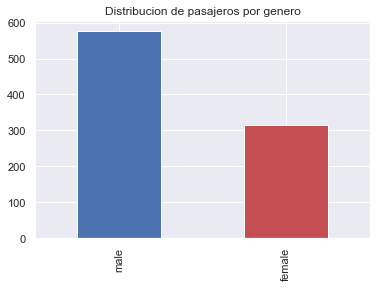

In [5]:
train_df.Sex.value_counts().plot(kind = 'bar', color = ['b', 'r'])
plt.title('Distribucion de pasajeros por genero')
plt.show()

### Preprocesamiento del dataset
Vamos a obtener solo aquellos atributos del dataset que nos sean útiles para la predicción.

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Vamos a transformar la variable Sex del dataset:
encoder_sex = label_encoder.fit_transform(train_df['Sex'])
train_df['Sex'] = encoder_sex
print(encoder_sex)
train_df.tail()

[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 0 1 1 1 1 1 1 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,Q


Vamos ahora a sustituir los datos nulos en la columna de age (puesto como NaN) por el valor de la mediana

In [7]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

Quitamos la etiqueta y otros atributos no relevantes. Y identificamos variables categoricas y numericas

In [8]:
train_predictors = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

# Esto no sirve para nada
'''
for cname in train_predictors.columns:
    print(cname,train_predictors[cname].nunique(),train_predictors[cname].dtype)

categorical_cols = [cname for cname in train_predictors.columns if
                    train_predictors[cname].nunique() < 10 and
                    train_predictors[cname].dtype == 'object']
categorical_cols
'''

"\nfor cname in train_predictors.columns:\n    print(cname,train_predictors[cname].nunique(),train_predictors[cname].dtype)\n\ncategorical_cols = [cname for cname in train_predictors.columns if\n                    train_predictors[cname].nunique() < 10 and\n                    train_predictors[cname].dtype == 'object']\ncategorical_cols\n"

In [9]:
train_predictors.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S


In [95]:
# Esto no sirve para nada:
'''
numerical_cols = [cname for cname in train_predictors.columns if
                   train_predictors[cname].dtype in ['int64', 'int32', 'float64']
                 ]
numerical_cols
'''

"\nnumerical_cols = [cname for cname in train_predictors.columns if\n                   train_predictors[cname].dtype in ['int64', 'int32', 'float64']\n                 ]\nnumerical_cols\n"

In [96]:
# No sirve para nada separar:
'''
my_cols = categorical_cols + numerical_cols
print(my_cols)

train_predictors = train_predictors[my_cols]
train_predictors.head()
'''

'\nmy_cols = categorical_cols + numerical_cols\nprint(my_cols)\n\ntrain_predictors = train_predictors[my_cols]\ntrain_predictors.head()\n'

**Generamos variables dummy para la variable categorica (Embarked): como lo haciamos en econometría**

In [10]:
train_predictors.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S


In [11]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)
dummy_encoded_train_predictors.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


In [12]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Entrenamiento del arbol de decisión

In [13]:
y_target = train_df['Survived'].values # Labels
x_features_one = dummy_encoded_train_predictors.values # Datos para entrenar
x_features_one

array([[ 3.,  1., 22., ...,  0.,  0.,  1.],
       [ 1.,  0., 38., ...,  1.,  0.,  0.],
       [ 3.,  0., 26., ...,  0.,  0.,  1.],
       ...,
       [ 3.,  0., 28., ...,  0.,  0.,  1.],
       [ 1.,  1., 26., ...,  1.,  0.,  0.],
       [ 3.,  1., 32., ...,  0.,  1.,  0.]])

In [14]:
# train, val, train_labels, val_labels
train_data, val_data, train_labels, val_labels = train_test_split(x_features_one, y_target, test_size = .25, random_state = 1)

In [15]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(train_data, train_labels)

In [16]:
tree_one_accuracy = round(tree_one.score(val_data, val_labels), 4)
print('Accuracy: %0.4f' % (tree_one_accuracy))

Accuracy: 0.7444
